In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

**Data Visualization**

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.shape

(1460, 81)

In [8]:
test_data.shape

(1459, 80)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

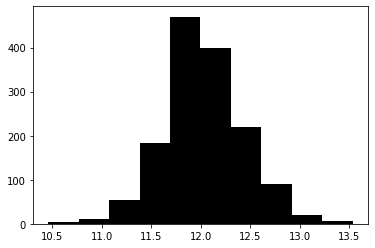

0.12134661989685329

In [11]:
train_data['LT_Salesprice']=np.log(train_data['SalePrice']+1)
plt.hist(train_data['LT_Salesprice'],color = 'black')
plt.show()
train_data['LT_Salesprice'].skew()

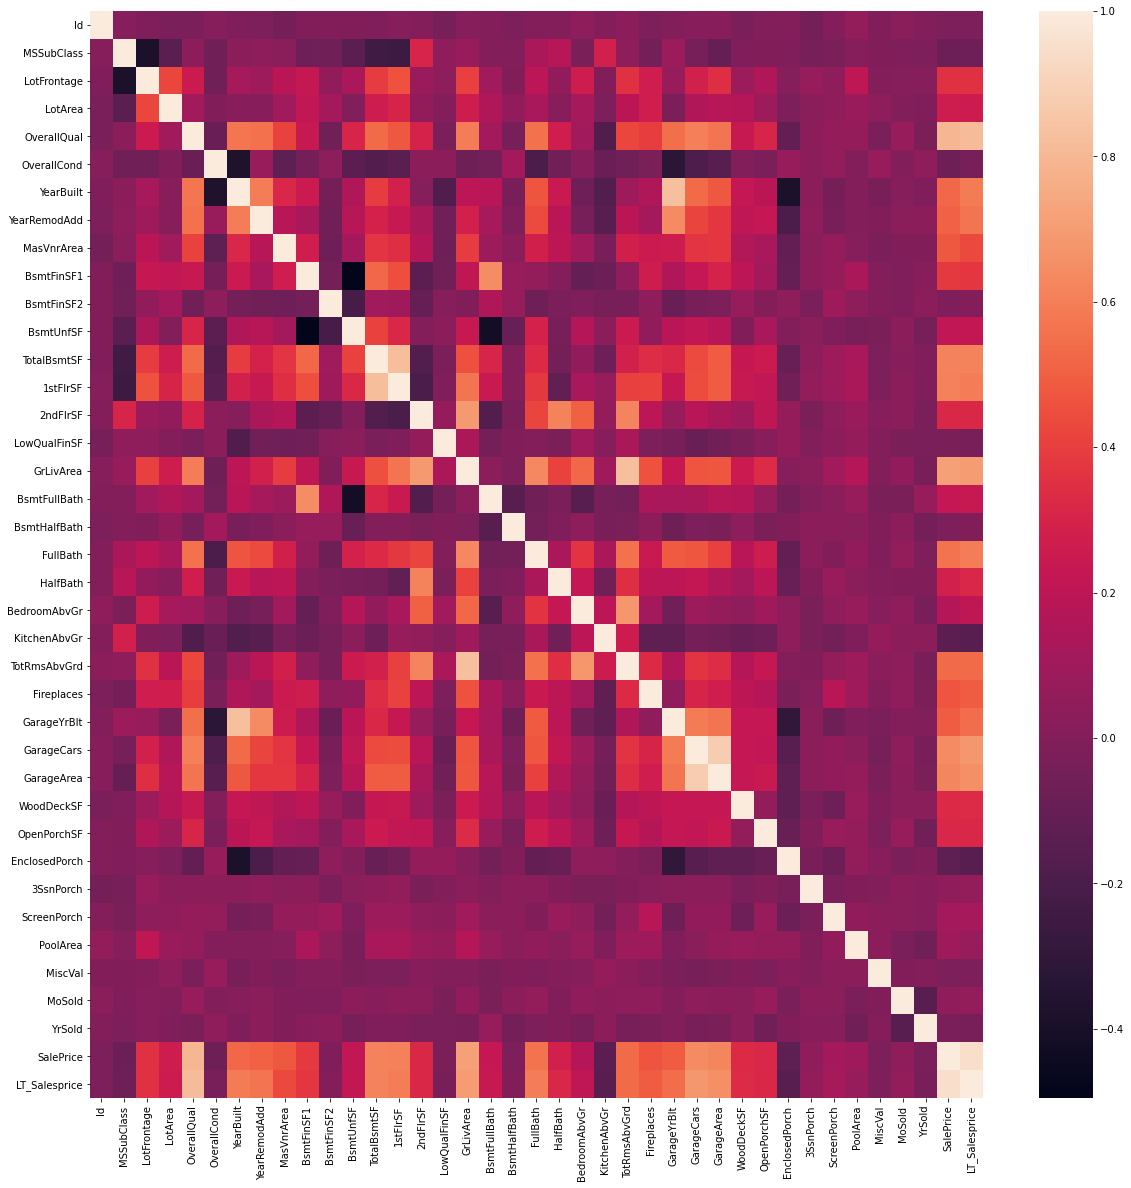

In [12]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr())
plt.show()

**Data Cleaning**

In [13]:
def data_cleaning(df):
    


    #Handling Null Values
    df['MSZoning'].fillna(value = df['MSZoning'].mode()[0],inplace=True)
    df.drop(['Alley','FireplaceQu','PoolQC','MiscFeature','Fence'], axis = 'columns',inplace = True)
    df['LotFrontage'].fillna(df['LotFrontage'].dropna().mean(),inplace = True)
    
    for Bsmt in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtFinType2','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','TotalBsmtSF'] :
        df[Bsmt].fillna((df[Bsmt].mode()[0]),inplace=True)
       
    for garage in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']:
        df[garage].fillna((df[garage].mode()[0]),inplace=True)   
    
    for other in ['SaleType','Functional','KitchenQual',
                  'Electrical','MasVnrType','Exterior1st','Exterior2nd','Utilities','MasVnrArea']:
        df[other].fillna((df[other].mode()[0]),inplace=True)  
    
    # print(df.isnull().sum())
    
    
    # List of numerical variables
    numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
    print('Number of numerical variables: ', len(numerical_features))
    
    # Visualise the numerical variables
    df[numerical_features].head()
    
    #Some Features aren't numerical as well as categorical.So we need to make few changes in it.
    year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
    year_feature
    df.groupby('YrSold')['SalePrice'].median().plot()
    plt.show()
    
    #Numerical features are of two types - Discrete & Continuos
    discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['id']]
      
    continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
    
    for feature in continuous_feature :
        data = df.copy()
        if 0 in data[feature].unique() :
            pass
        else:
            data[feature] = np.log(data[feature])
            data['SalePrice'] = np.log(data['SalePrice'])
            plt.scatter(data[feature],data['SalePrice'])
            plt.xlabel(feature)
            plt.ylabel('Salesprice')
            plt.show()
            
    #Outliers
    #If u have lots of outliers replace nan with mode or median
    for feature in continuous_feature :
        data = df.copy()
        if 0 in data[feature].unique() :
            pass
        else:
            data[feature] = np.log(data[feature])
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
            
    #Changing the years column to numerical data        
    for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
        df[feature]=df['YrSold']-df[feature]
        
    #Categorical Features
    categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
    len(categorical_features)  
    for feature in categorical_features:
        temp=df.groupby(feature)['SalePrice'].count()/len(df)
        temp_df=temp[temp>0.01].index
        df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    df.shape    
    
    for features in categorical_features:
        dummies = pd.get_dummies(df[features])
        merged = pd.concat([df,dummies],axis = 'columns')
        df = merged.copy()
    
    for feature in categorical_features:
        df.drop(feature, axis = 'columns',inplace = True)
        
    df.drop('LT_Salesprice', axis = 'columns',inplace = True) 
    return df

**Merging Train & Test Data**

Number of numerical variables:  39


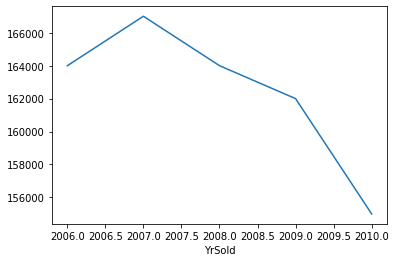

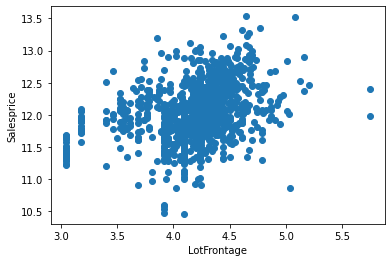

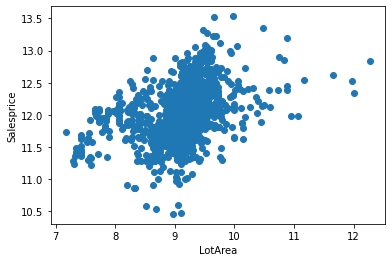

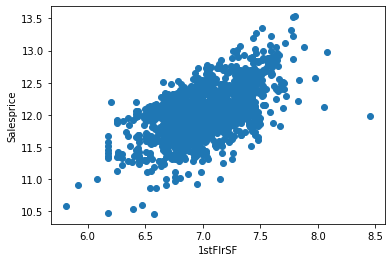

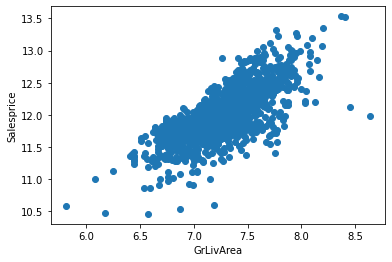

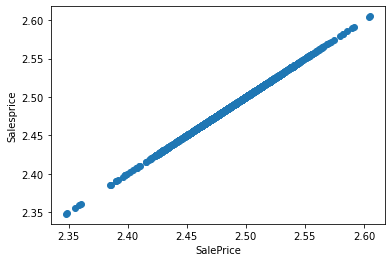

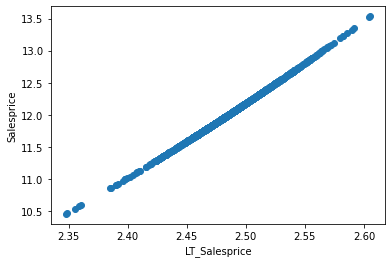

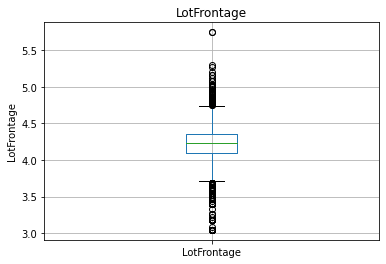

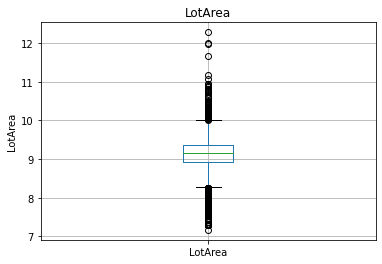

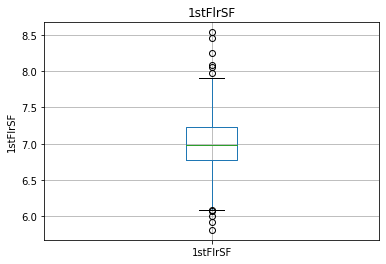

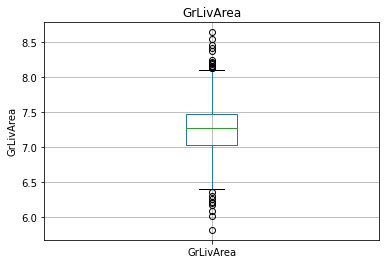

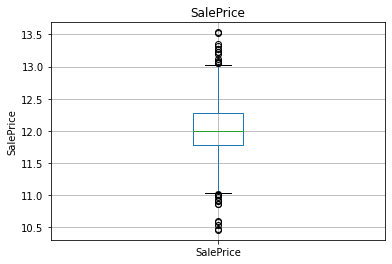

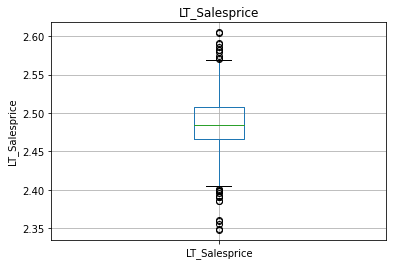

In [14]:
Dataset = pd.concat([train_data,test_data])
clean_data = data_cleaning(Dataset)

**Splitting the Merged data into train and test data as before**

In [16]:
clean_test = clean_data.iloc[1460:,:]
clean_test.to_csv('CleanTestData.csv',index = False)

In [17]:
clean_train = clean_data.iloc[:1460,:]
clean_train.to_csv('CleanTrainData.csv',index = False)

In [20]:
X_train = clean_train.drop('SalePrice',axis = 'columns')
y_train = clean_train.SalePrice
X_test = clean_test.drop('SalePrice',axis = 'columns')

**Exploring different regression models and ensembles like Random Forests**

In [21]:
from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,y_train)
# y_test = lr.predict(X_test)
# (lr.score(X_train,y_train))

from sklearn.model_selection import cross_val_score
print(cross_val_score(LinearRegression(), X_train, y_train,cv=3))

from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

model_params = {
    'svm': {
        'model': svm.LinearSVR(max_iter=1000),
        'params' : {
            'C': [1,10,20,30,40],
            'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,30,20,2500]
        }
    },
 
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,0.1,0.001,0.00001],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse','mae', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [1,2,15,20],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
                       
                
        
        }}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
ML_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(ML_result)

#From the model we can see Random forest is better

[-5.70972944e+05  8.27780441e-01  7.57327467e-01]
               model     best_score  \
0                svm       0.692635   
1      random_forest       0.857396   
2  linear_regression -190323.786321   
3              lasso       0.816625   
4      decision_tree       0.722169   
5              Ridge       0.827552   

                                        best_params  
0  {'C': 30, 'loss': 'squared_epsilon_insensitive'}  
1                            {'n_estimators': 2500}  
2                              {'normalize': False}  
3               {'alpha': 1, 'selection': 'cyclic'}  
4          {'criterion': 'mae', 'splitter': 'best'}  
5                   {'alpha': 20, 'solver': 'auto'}  


**RandomForestRegressor**

In [22]:
model = RandomForestRegressor(n_estimators = 2500)
# scaler.inverse_transform(X_test)
model.fit(X_train,y_train)
y_test = model.predict(X_test)
y_test

**Exporting Predicted Values**

In [22]:
submission = pd.DataFrame(columns=['Id', 'SalePrice'])
submission['Id'] = X_test['Id']
submission['SalePrice'] = y_test

submission.to_csv('SubmissionDATA2.csv', index=False)
print("submission succesfull")

submission succesfull
